In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)

df = pd.read_csv("benchmark.csv")
df.head()

palette = {
    "RIBLT": "#E69F00",
    "TRADI": "#56B4E9"
}

order = ["RIBLT", "TRADI"]

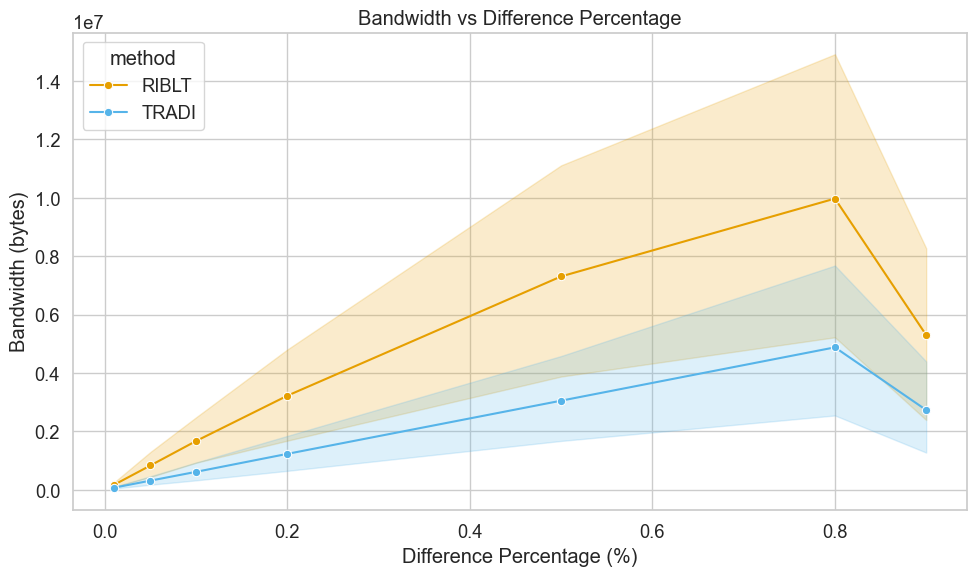

In [8]:
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=df,
    x="diff",
    y="bandwidth",
    hue="method",
    marker="o",
    palette=palette,
    hue_order=order
)

plt.title("Bandwidth vs Difference Percentage")
plt.xlabel("Difference Percentage (%)")
plt.ylabel("Bandwidth (bytes)")
plt.grid(True)
plt.tight_layout()
plt.show()

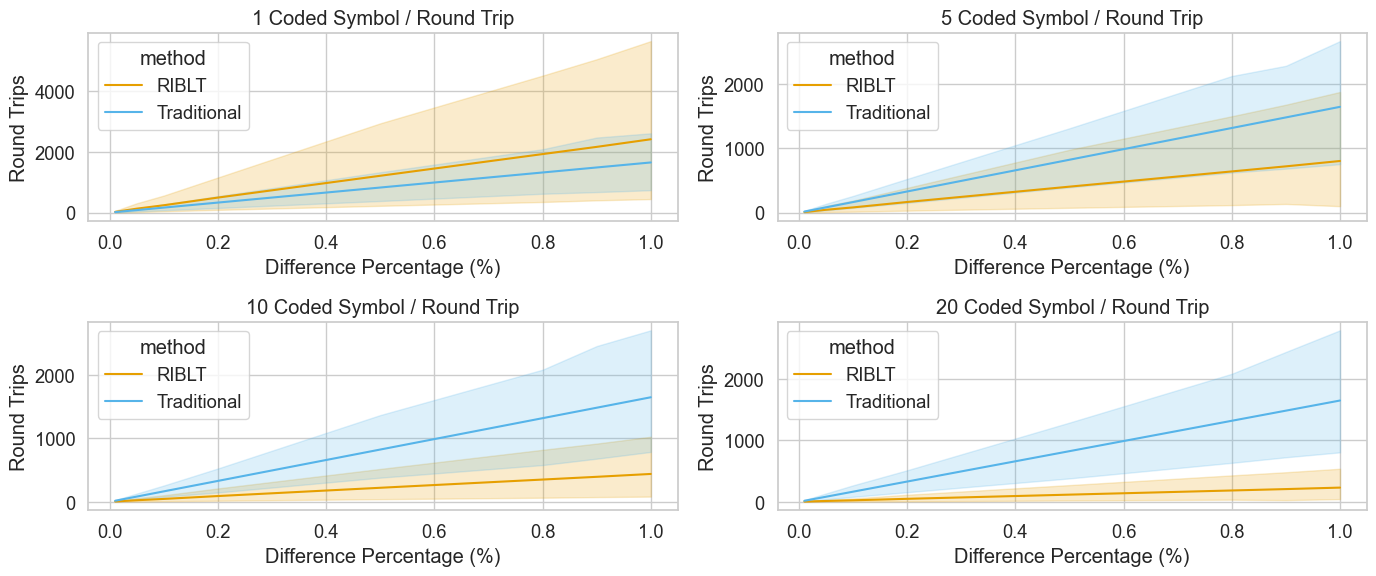

In [5]:
df_1 = df[
    (df["method"] == "TRADI") |
    ((df["method"] == "RIBLT") & (df["coded_symbols_per_round_trip"] == 1))
]

df_5 = df[
    (df["method"] == "TRADI") |
    ((df["method"] == "RIBLT") & (df["coded_symbols_per_round_trip"] == 5))
]

df_10 = df[
    (df["method"] == "TRADI") |
    ((df["method"] == "RIBLT") & (df["coded_symbols_per_round_trip"] == 10))
]

df_20 = df[
    (df["method"] == "TRADI") |
    ((df["method"] == "RIBLT") & (df["coded_symbols_per_round_trip"] == 20))
]

fig, ax = plt.subplots(2, 2, figsize=(14, 6))

sns.lineplot(data=df_1, x="diff", y="round_trips", hue="method", ax=ax[0, 0], palette=palette, hue_order=order)
sns.lineplot(data=df_5, x="diff", y="round_trips", hue="method", ax=ax[0, 1], palette=palette, hue_order=order)
sns.lineplot(data=df_10, x="diff", y="round_trips", hue="method", ax=ax[1, 0], palette=palette, hue_order=order)
sns.lineplot(data=df_20, x="diff", y="round_trips", hue="method", ax=ax[1, 1], palette=palette, hue_order=order)

ax[0, 0].set_title("1 Coded Symbol / Round Trip")
ax[0, 1].set_title("5 Coded Symbol / Round Trip")
ax[1, 0].set_title("10 Coded Symbol / Round Trip")
ax[1, 1].set_title("20 Coded Symbol / Round Trip")

ax[0, 0].set_xlabel("Difference Percentage (%)")
ax[0, 1].set_xlabel("Difference Percentage (%)")
ax[1, 0].set_xlabel("Difference Percentage (%)")
ax[1, 1].set_xlabel("Difference Percentage (%)")

ax[0, 0].set_ylabel("Round Trips")
ax[0, 1].set_ylabel("Round Trips")
ax[1, 0].set_ylabel("Round Trips")
ax[1, 1].set_ylabel("Round Trips")


plt.tight_layout()
plt.show()

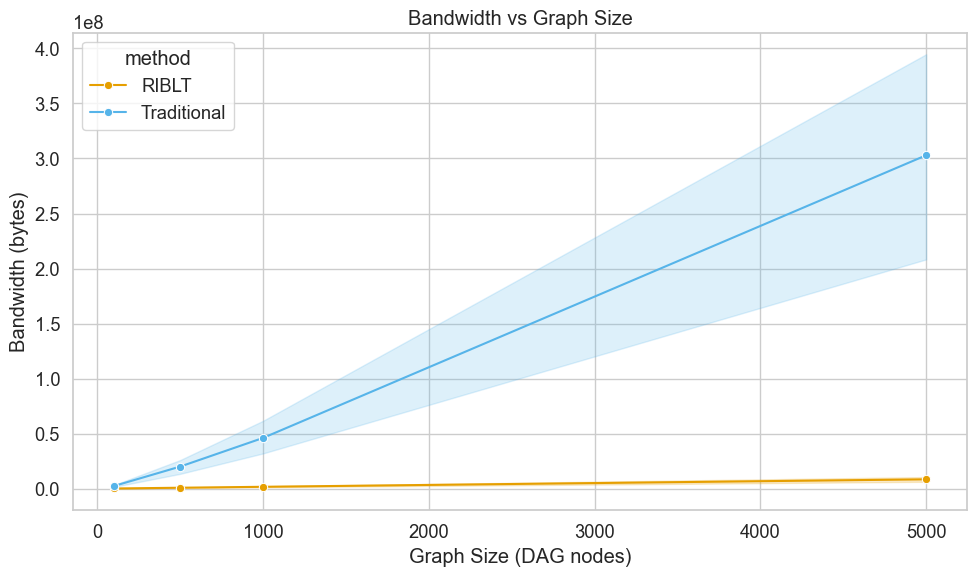

In [6]:
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=df,
    x="graph_size",
    y="bandwidth",
    hue="method",
    marker="o",
    palette=palette,
    hue_order=order
)

plt.title("Bandwidth vs Graph Size")
plt.xlabel("Graph Size (DAG nodes)")
plt.ylabel("Bandwidth (bytes)")
plt.grid(True)
plt.tight_layout()
plt.show()

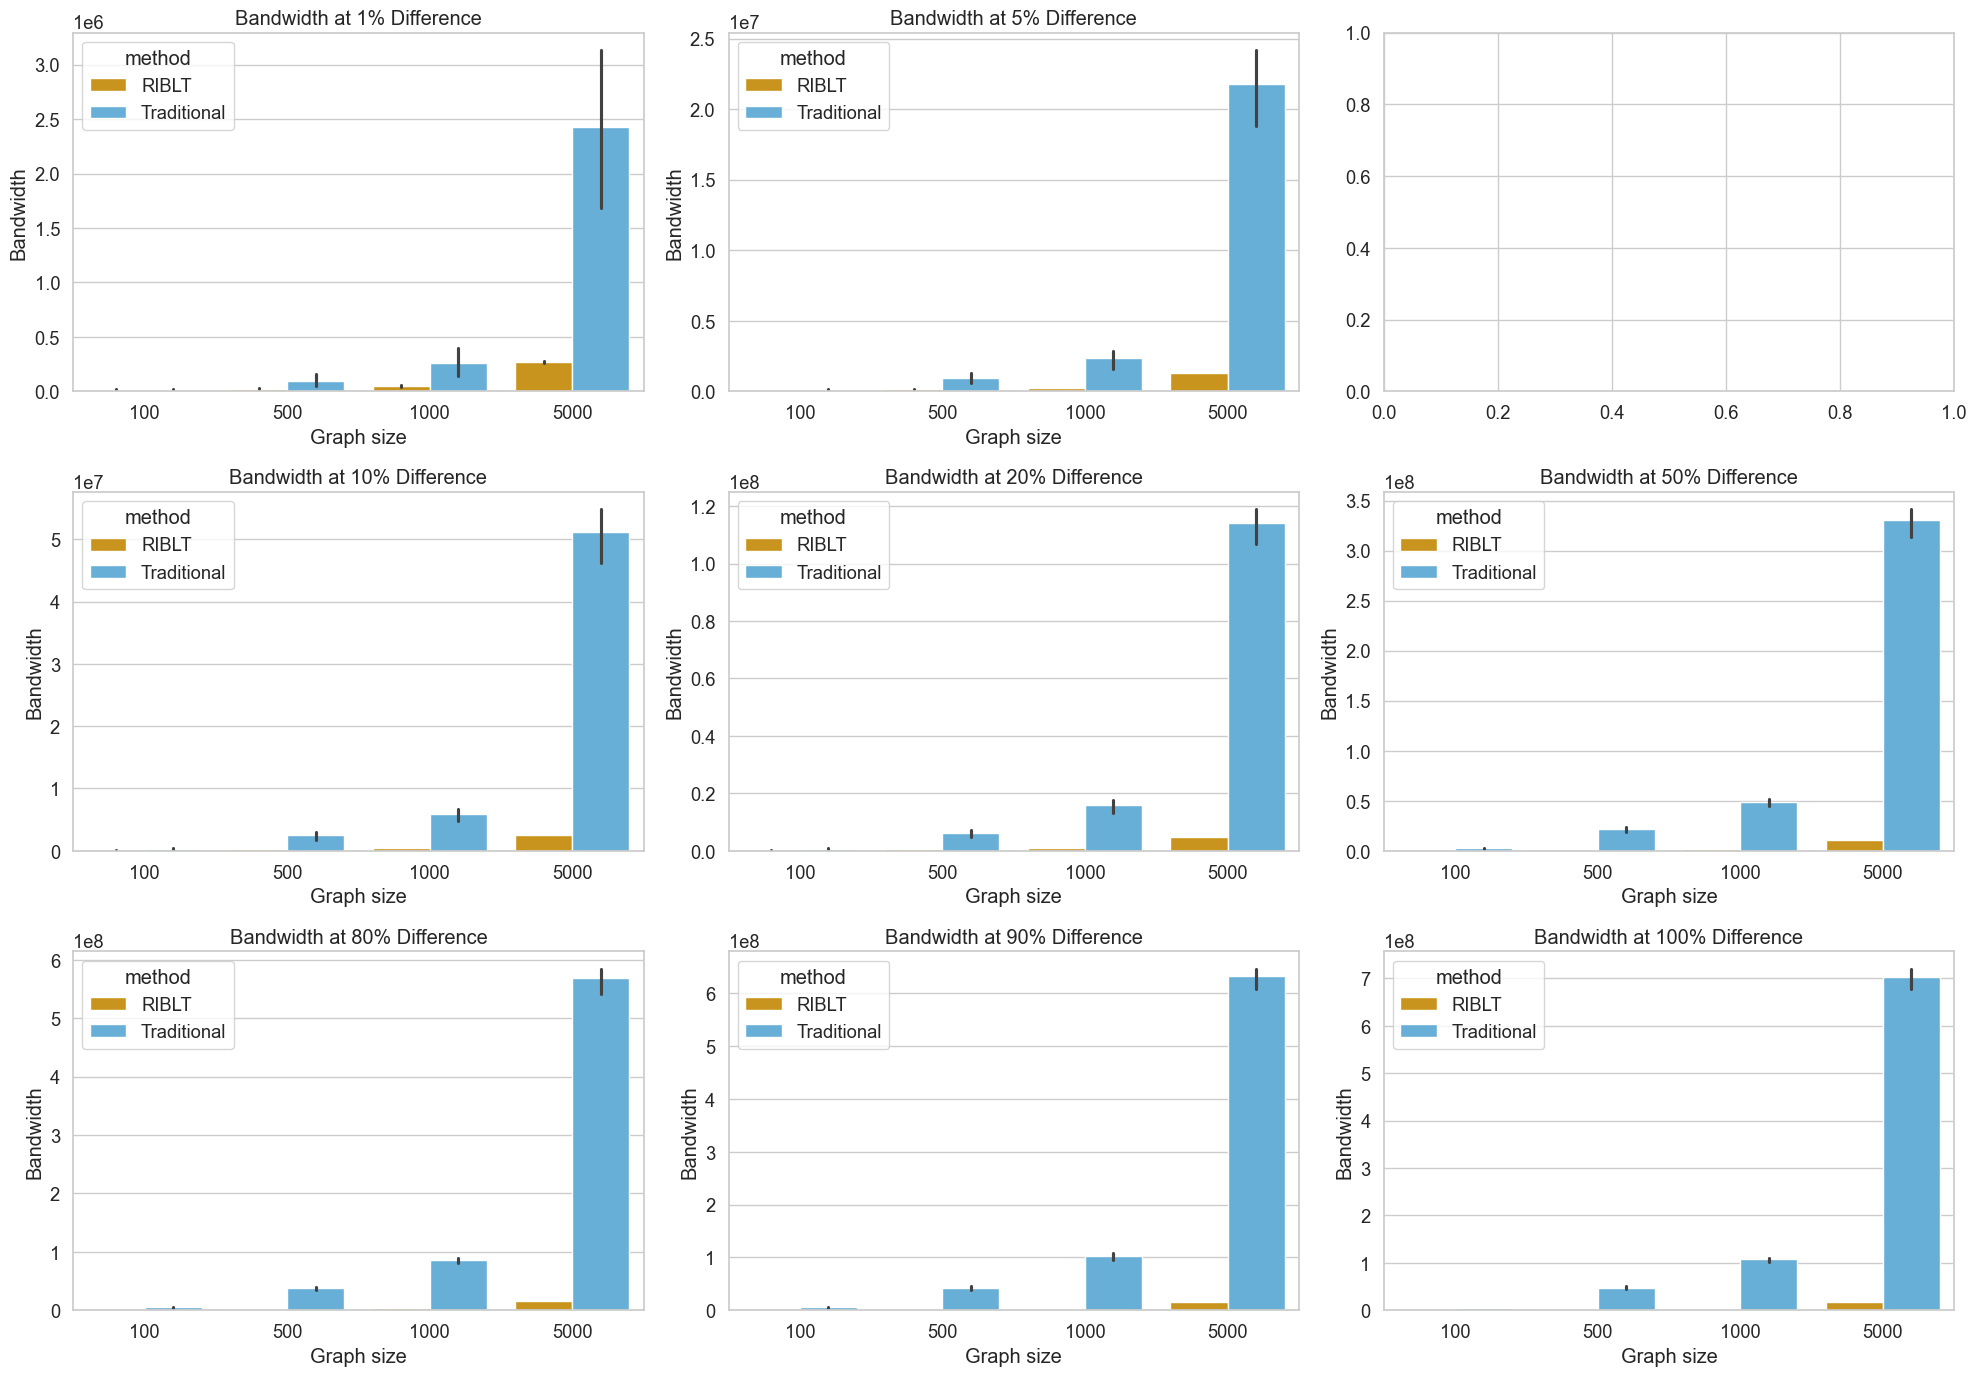

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(20, 14))

df_01 = df[df['diff'] == 0.01]
df_05 = df[df['diff'] == 0.05]
df_10 = df[df['diff'] == 0.1]
df_20 = df[df['diff'] == 0.2]
df_50 = df[df['diff'] == 0.5]
df_80 = df[df['diff'] == 0.8]
df_90 = df[df['diff'] == 0.9]
df_100 = df[df['diff'] == 1.0]

sns.barplot(data=df_01, x="graph_size", y="bandwidth", hue="method", ax=ax[0, 0], palette=palette, hue_order=order)
sns.barplot(data=df_05, x="graph_size", y="bandwidth", hue="method", ax=ax[0, 1], palette=palette, hue_order=order)
sns.barplot(data=df_10, x="graph_size", y="bandwidth", hue="method", ax=ax[1, 0], palette=palette, hue_order=order)
sns.barplot(data=df_20, x="graph_size", y="bandwidth", hue="method", ax=ax[1, 1], palette=palette, hue_order=order)
sns.barplot(data=df_50, x="graph_size", y="bandwidth", hue="method", ax=ax[1, 2], palette=palette, hue_order=order)
sns.barplot(data=df_80, x="graph_size", y="bandwidth", hue="method", ax=ax[2, 0], palette=palette, hue_order=order)
sns.barplot(data=df_90, x="graph_size", y="bandwidth", hue="method", ax=ax[2, 1], palette=palette, hue_order=order)
sns.barplot(data=df_100, x="graph_size", y="bandwidth", hue="method", ax=ax[2, 2], palette=palette, hue_order=order)

ax[0, 0].set_title("Bandwidth at 1% Difference")
ax[0, 1].set_title("Bandwidth at 5% Difference")
ax[1, 0].set_title("Bandwidth at 10% Difference")
ax[1, 1].set_title("Bandwidth at 20% Difference")
ax[1, 2].set_title("Bandwidth at 50% Difference")
ax[2, 0].set_title("Bandwidth at 80% Difference")
ax[2, 1].set_title("Bandwidth at 90% Difference")
ax[2, 2].set_title("Bandwidth at 100% Difference")

ax[0, 0].set_xlabel("Graph size")
ax[0, 1].set_xlabel("Graph size")
ax[1, 0].set_xlabel("Graph size")
ax[1, 1].set_xlabel("Graph size")
ax[1, 2].set_xlabel("Graph size")
ax[2, 0].set_xlabel("Graph size")
ax[2, 1].set_xlabel("Graph size")
ax[2, 2].set_xlabel("Graph size")

ax[0, 0].set_ylabel("Bandwidth")
ax[0, 1].set_ylabel("Bandwidth")
ax[1, 0].set_ylabel("Bandwidth")
ax[1, 1].set_ylabel("Bandwidth")
ax[1, 2].set_ylabel("Bandwidth")
ax[2, 0].set_ylabel("Bandwidth")
ax[2, 1].set_ylabel("Bandwidth")
ax[2, 2].set_ylabel("Bandwidth")

plt.tight_layout()
plt.show()

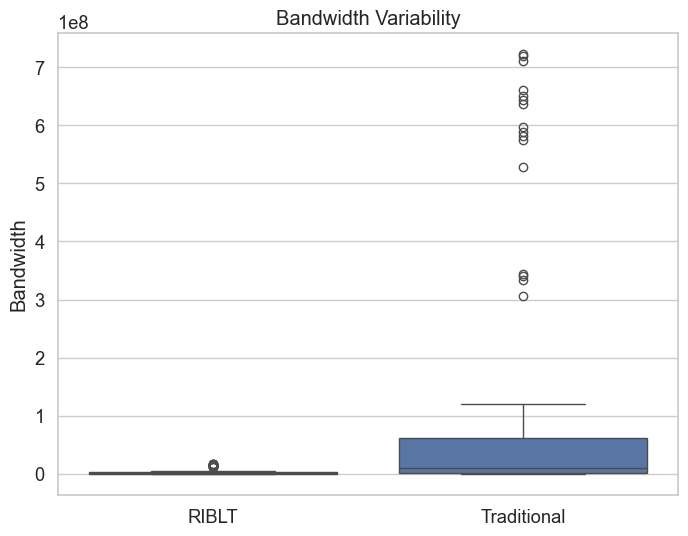

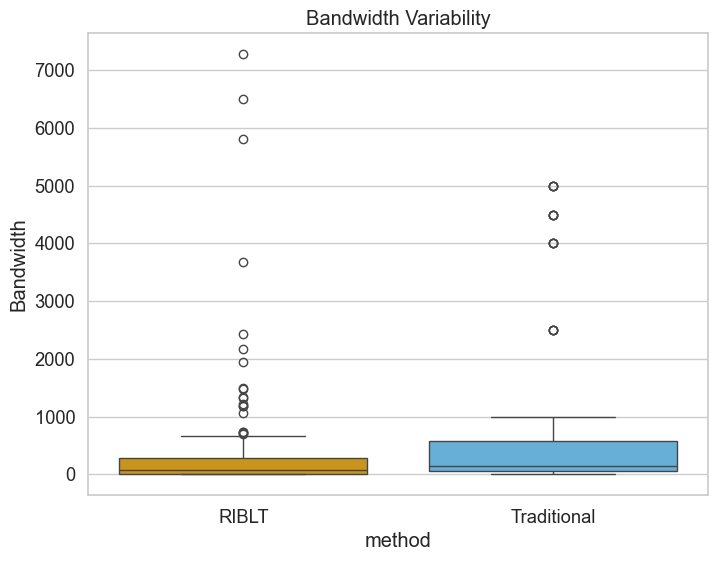

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x="method",
    y="bandwidth"
)
plt.xlabel("")
plt.ylabel("Bandwidth")
plt.title("Bandwidth Variability")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x="method",
    y="round_trips",
    hue="method",
    palette=palette, hue_order=order
)
plt.title("Round Trips Variability")
plt.ylabel("Bandwidth")
plt.title("Bandwidth Variability")
plt.show()

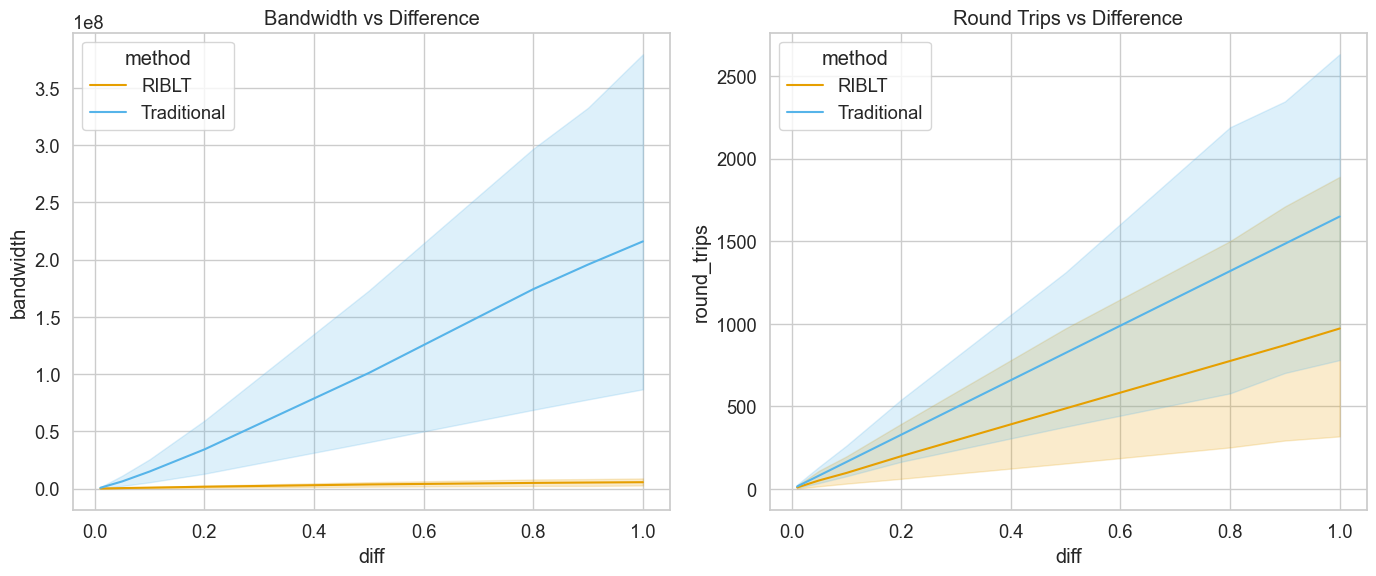

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.lineplot(data=df, x="diff", y="bandwidth", hue="method", ax=ax[0], palette=palette, hue_order=order)
sns.lineplot(data=df, x="diff", y="round_trips", hue="method", ax=ax[1], palette=palette, hue_order=order)

ax[0].set_title("Bandwidth vs Difference")
ax[1].set_title("Round Trips vs Difference")

plt.tight_layout()
plt.show()